In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import multivariate_normal
from matplotlib import cm

# 1. Παρουσιάστε στους γιατρούς τις τιμές των κατανομών p(x|ω1) και p(x|ω2) για διακριτές τιμές x.

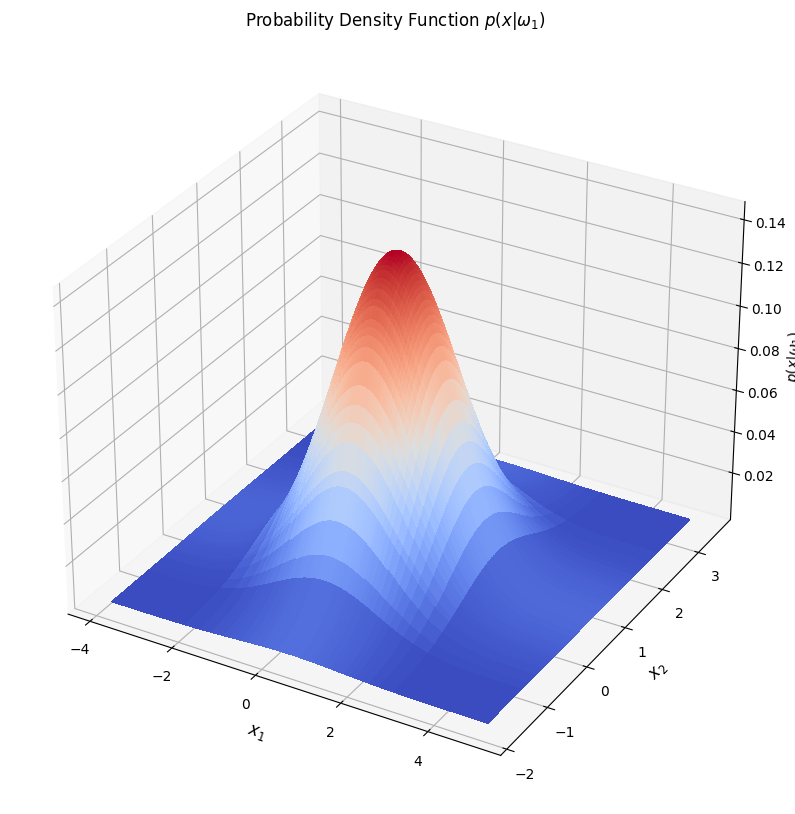

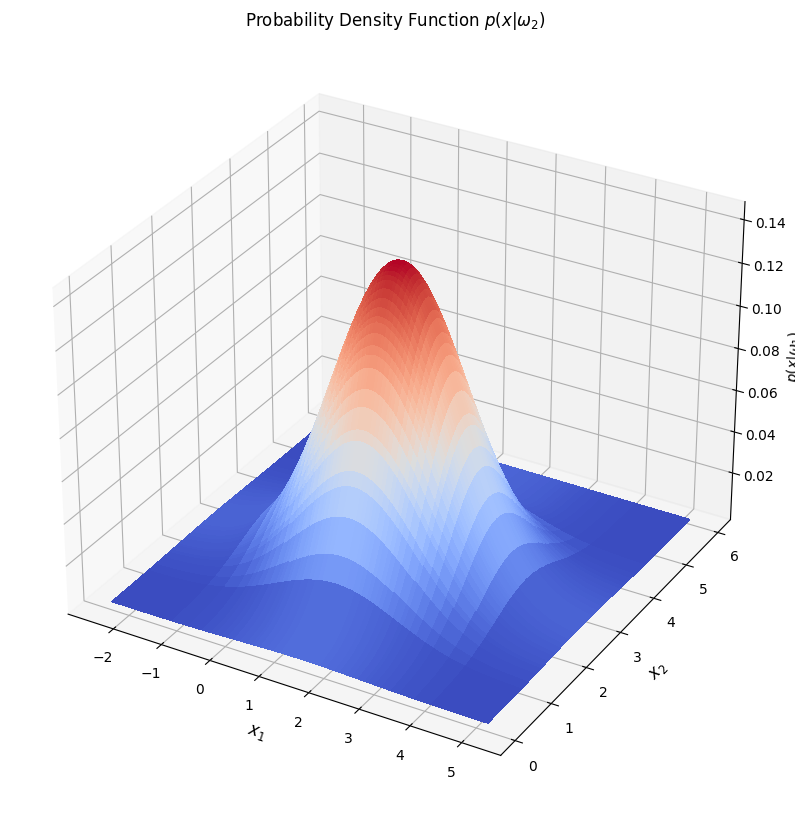

In [11]:
mu = [[0.4, 0.8], [1.5, 2.7]]
cov = [[1.5, 0], [0, 0.8]] 
N = 1000

p_x_w = np.zeros((N,N,2))
for i in range(len(mu)):
    x1, x2 = np.random.multivariate_normal(mu[i], cov, N).T
    x1, x2 = np.meshgrid(np.sort(x1),np.sort(x2))
    
    data = np.empty(x1.shape + (2,))
    data[:,:,0] = x1
    data[:,:,1] = x2

    y= multivariate_normal.pdf(data,mu[i],cov)
    p_x_w[:,:,i] = y
    
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111,projection='3d')
    axes.plot_surface(X=x1,Y=x2,Z=y,cmap=cm.coolwarm,linewidth=0,antialiased=False)
    axes.set_xlabel('$x_1$',fontsize='large')
    axes.set_ylabel('$x_2$',fontsize='large')
    axes.set_zlabel(r'$p(x|ω_1)$')
    if i==0:
        axes.set_title(r'Probability Density Function $p(x|ω_1)$')
    elif i==1:
        axes.set_title(r'Probability Density Function $p(x|ω_2)$')
    plt.show()

# 2. Υπολογίστε την ολική κατανομή πιθανότητας και παρουσιάστε τη.

P(x) = Σ[P(x|ωi)P(ωi)]

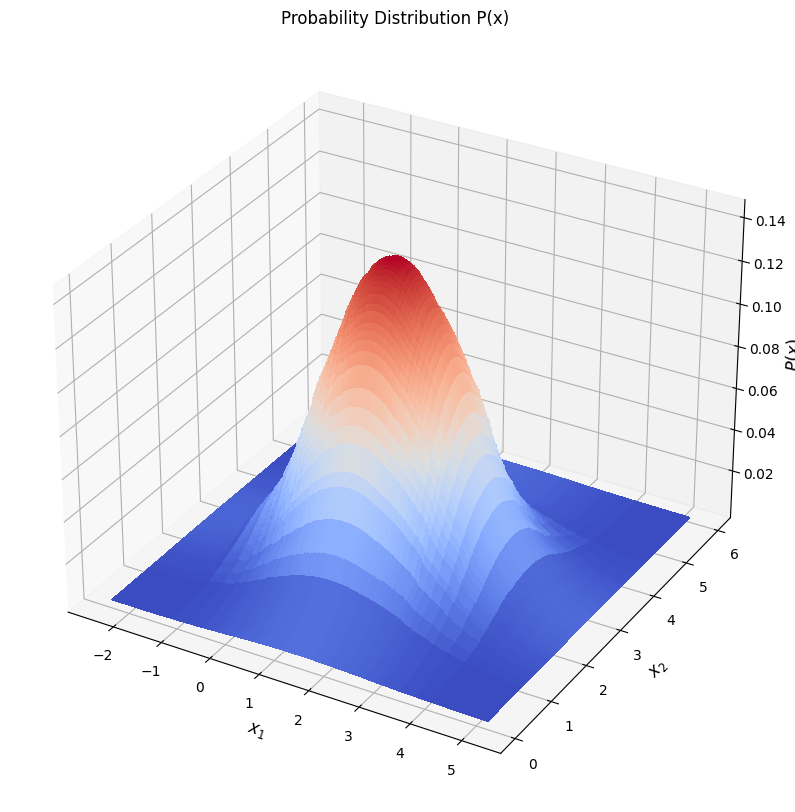

In [13]:
prob = np.zeros((N,N,2))
p_w1 = 0.95
p_w2 = 0.05
prob[:,:,0] = p_x_w[:,:,0]*p_w1
prob[:,:,1] = p_x_w[:,:,1]*p_w2

prob = np.sum(prob, axis=2)

fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(111,projection='3d')
axes.plot_surface(X=x1,Y=x2,Z=prob,cmap=cm.coolwarm,linewidth=0,antialiased=False)
axes.set_xlabel('$x_1$',fontsize='large')
axes.set_ylabel('$x_2$',fontsize='large')
axes.set_zlabel(r'$P(x)$',fontsize='large')
axes.set_title('Probability Distribution P(x)',fontsize='large')
plt.show()

# 3. Υπολογίστε τις a posteriori πιθανότητες P(ω1|x) και P(ω2|x) και συμπεριλάβετέ τις στην παρουσίασή σας.

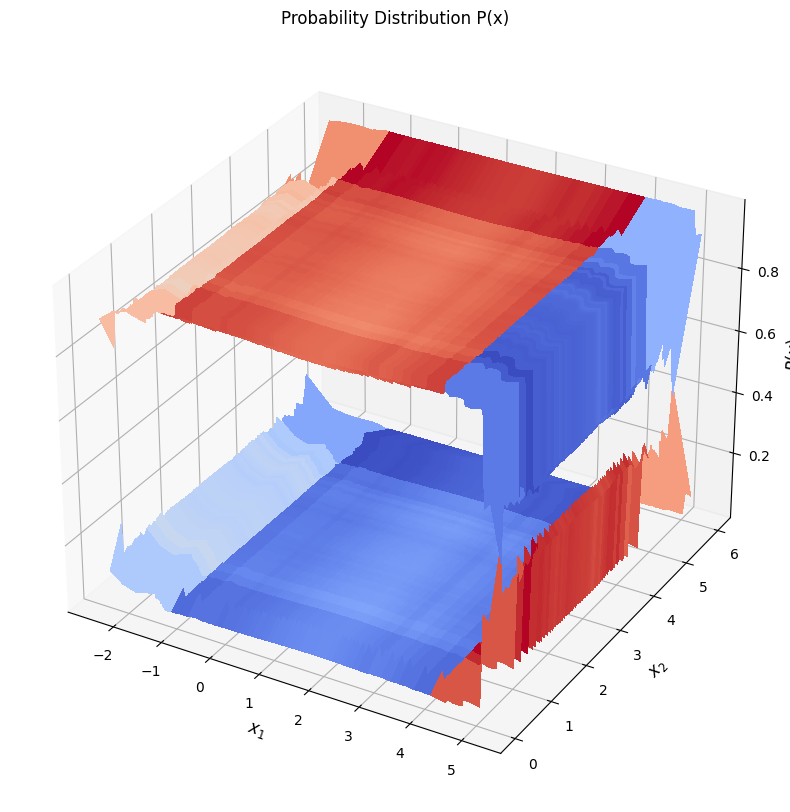

In [34]:
p_w1_x = p_x_w[:,:,0]*p_w1/prob
p_w2_x = p_x_w[:,:,1]*p_w2/prob

fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(111,projection='3d')
axes.plot_surface(X=x1,Y=x2,Z=p_w1_x,cmap=cm.coolwarm,linewidth=0,antialiased=False)
axes.plot_surface(X=x1,Y=x2,Z=p_w2_x,cmap=cm.coolwarm,linewidth=0,antialiased=False)
axes.set_xlabel('$x_1$',fontsize='large')
axes.set_ylabel('$x_2$',fontsize='large')
axes.set_zlabel(r'$P(x)$',fontsize='large')
axes.set_title('Probability Distribution P(x)',fontsize='large')
plt.show()